> > # 1. Importing your Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from PIL import Image
from glob import glob
import cv2
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense , Dropout, Flatten , Conv2D,MaxPool2D
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import os

# 2. Import your Data and sort it due to status

In [2]:
def read_images(path,num_img):
    array=np.zeros((num_img,224,224,3))
    i=0
    for img in os.listdir(path):
        img_path=path + "/" + img
        img=Image.open(img_path,mode="r")
        data=np.asarray(img,dtype="uint8")
        array[i]=data
        i+=1
    return array
#no
no_dr_path=r"/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/No_DR"
num_no_dr=len(glob("/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/No_DR/*"))
no_dr_array=read_images(no_dr_path,num_no_dr)
no_dr_array=no_dr_array.astype(np.uint8)
#mild
mild_path=r"/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Mild"
num_mild=len(glob("/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Mild/*"))
mild_array=read_images(mild_path,num_mild)
mild_array=mild_array.astype(np.uint8)
#moderate
moderate_path=r"/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Moderate"
num_moderate=len(glob("/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Moderate/*"))
moderate_array=read_images(moderate_path,num_moderate)
moderate_array=moderate_array.astype(np.uint8)
#proliferate
proliferate_dr_path=r"/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Proliferate_DR"
num_proliferate_dr=len(glob("/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Proliferate_DR/*"))
proliferate_dr_array=read_images(proliferate_dr_path,num_proliferate_dr)
proliferate_dr_array=proliferate_dr_array.astype(np.uint8)
#severe
severe_path =r"/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Severe"
num_severe=len(glob("/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Severe/*"))
severe_array=read_images(severe_path,num_severe)
severe_array=severe_array.astype(np.uint8)

# ** 3. Profe of concept**

In [3]:
print("no_dr_array",no_dr_array.shape)
print("mild_array",mild_array.shape)
print("moderate_array",moderate_array.shape)
print("proliferate_dr_array",proliferate_dr_array.shape)
print("severe_array",severe_array.shape)

print("num_no_dr:",num_no_dr)
print("num_mild:",num_mild)
print("num_moderate:",num_moderate)
print("num_proliferate_dr:",num_proliferate_dr)
print("num_severe:",num_severe)

no_dr_array (1805, 224, 224, 3)
mild_array (370, 224, 224, 3)
moderate_array (999, 224, 224, 3)
proliferate_dr_array (295, 224, 224, 3)
severe_array (193, 224, 224, 3)
num_no_dr: 1805
num_mild: 370
num_moderate: 999
num_proliferate_dr: 295
num_severe: 193


# 4. Take first glance at Data

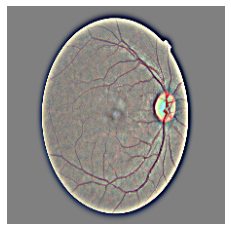

In [4]:
plt.imshow(no_dr_array[20])
plt.axis("off")
plt.show()

> # 5. Little EDA

In [5]:
zeros=np.zeros(1805)
ones=np.ones(370)
twos=np.full(999,2)
threes=np.full(295,3)
fours=np.full(193,4)
y = np.concatenate((zeros,ones,twos,threes,fours),axis=0)
print("y shape",y.shape)

y shape (3662,)


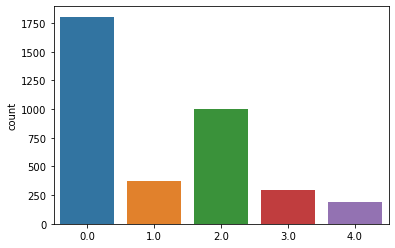

In [6]:
sns.countplot(y)
plt.show()

> # 6. Resize Images

In [7]:
def resize_images(img):
    number_of_image=img.shape[0]
    new_array=np.zeros((number_of_image,64,64,3))
    for i in range(number_of_image):
        new_array[i]=cv2.resize(img[i,:,:,:],(64,64))
    return new_array
no_dr_array=resize_images(no_dr_array)
no_dr_array=no_dr_array.astype(np.uint8)
mild_array=resize_images(mild_array)
mild_array=mild_array.astype(np.uint8)
moderate_array=resize_images(moderate_array)
moderate_array=moderate_array.astype(np.uint8)
proliferate_dr_array=resize_images(proliferate_dr_array)
proliferate_dr_array=proliferate_dr_array.astype(np.uint8)
severe_array=resize_images(severe_array)
severe_array=severe_array.astype(np.uint8)

plt.imshow(no_dr_array[1])
plt.axis("off")
plt.show()

# 7. Train Test Split - Preperation

In [8]:
y = to_categorical(y,5)
print("new y shape",y.shape)

new y shape (3662, 5)


In [9]:
x=np.concatenate((no_dr_array,mild_array,moderate_array,proliferate_dr_array,severe_array),axis=0)
print("x shape",x.shape)
print("x dtype is ",x.dtype)

x shape (3662, 64, 64, 3)
x dtype is  uint8


In [10]:
x=x / 255.0

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (2563, 64, 64, 3)
x_test shape (1099, 64, 64, 3)
y_train shape (2563, 5)
y_test shape (1099, 5)


# 8. Prepare your model

In [12]:
model = Sequential()

model.add(Conv2D(filters=250,kernel_size=(3,3),activation="relu",padding="same",input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=1))

model.add(Conv2D(filters=125,kernel_size=(3,3),activation="relu",padding="same"))
model.add(MaxPool2D(pool_size=(2,2),strides=1))


model.add(Flatten())
model.add(Dense(250,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(125,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(5,activation="softmax"))

In [13]:
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])

In [14]:
batch_size=200
epochs=30

# **9. Random Image Generator for Train - Data**

In [15]:
datagen=ImageDataGenerator(
                          shear_range=0.3,
                          horizontal_flip=True,
                          vertical_flip=True,
                          zoom_range=0.3,
                          rotation_range=0.3)
datagen.fit(x_train)

# **10. Run the model**

In [16]:
hist=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),
                        epochs=epochs,validation_data=(x_test,y_test),steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/30
12/12 [==============================] - 5s 380ms/step - loss: 18.8069 - accuracy: 0.3441 - val_loss: 1.5578 - val_accuracy: 0.2721
Epoch 2/30
12/12 [==============================] - 4s 321ms/step - loss: 1.5131 - accuracy: 0.3970 - val_loss: 1.3154 - val_accuracy: 0.5050
Epoch 3/30
12/12 [==============================] - 4s 374ms/step - loss: 1.5032 - accuracy: 0.4507 - val_loss: 1.1493 - val_accuracy: 0.5050
Epoch 4/30
12/12 [==============================] - 4s 361ms/step - loss: 1.2708 - accuracy: 0.4917 - val_loss: 1.4180 - val_accuracy: 0.3849
Epoch 5/30
12/12 [==============================] - 4s 307ms/step - loss: 1.3745 - accuracy: 0.4786 - val_loss: 1.0853 - val_accuracy: 0.5050
Epoch 6/30
12/12 [==============================] - 4s 305ms/step - loss: 1.9600 - accuracy: 0.4723 - val_loss: 1.7269 - val_accuracy: 0.2793
Epoch 7/30
12/12 [==============================] - 4s 321ms/step - loss: 1.4878 - accuracy: 0.4215 - val_loss: 1.0595 - val_accuracy: 0.5105
Epoch

# **11. Show Results**

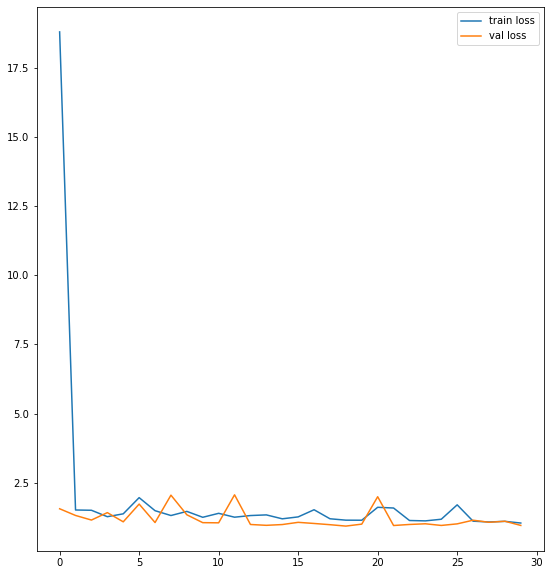

In [17]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(hist.history["loss"],label="train loss")
plt.plot(hist.history["val_loss"],label="val loss")
plt.legend()
plt.show()

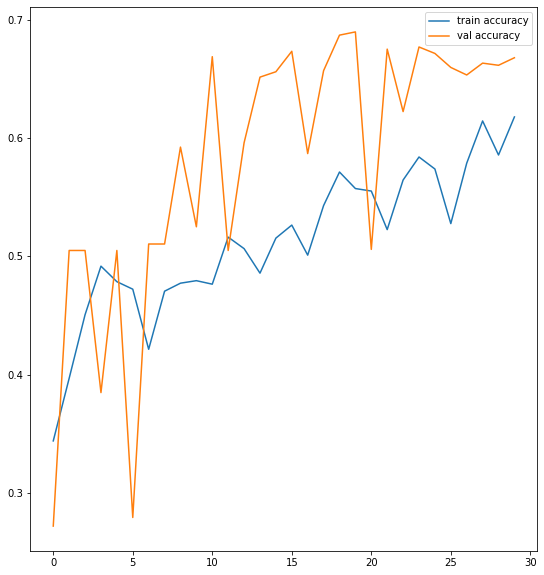

In [18]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,2)
plt.plot(hist.history["accuracy"],label="train accuracy")
plt.plot(hist.history["val_accuracy"],label="val accuracy")
plt.legend()
plt.show()